In [64]:
# import standard libraries
import numpy as np
import pandas as pd
import glob
import time
import os

import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import date, timedelta


## import statistical library
from scipy.stats import spearmanr
import scipy.stats as stats
from scipy.stats import lognorm


# import viz libraries
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


# import model libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import load_model
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [65]:
# ----- initiate workspace -----
# set date
today_date = date.today()
days = pd.date_range(start=today_date, periods=14)
yesterday = today_date - timedelta(days=1)
yesterday = yesterday.strftime("%Y-%m-%d")
today_date = today_date.strftime("%Y-%m-%d")

In [66]:
# # set file path
# crude = "../historical-dataset/Crude Oil Prices.csv"

# # load dataset
# main_crude = pd.read_csv(crude, parse_dates=["Date"], index_col=["Date"]).sort_index(ascending=True)
# main_crude = main_crude[:yesterday] # take data 'till the last closed price

# # load trained model
# use_model = load_model("../models/multistep-crude-oil-model.h5")

# # ----- load and read dataframe -----
# # copy dataframe, find price difference between monday to monday
# main_df = main_crude.copy()
# main_df = main_df[["Price"]] # only need price column
# main_df["DayName"] = main_df.index.day_name() # create new column that will contain day name for every given record dates
# main_df = main_df[main_df["DayName"]=="Monday"] # this will initiate a records between monday to monday
# main_df["PrevPriceWeek"] = main_df['Price'].shift() # shift data by one week
# main_df["PriceDiff"] = main_df['Price'] - main_df['PrevPriceWeek'] # subtract shifted values from original values
# main_df["PriceDiffAbs"] = main_df["PriceDiff"].abs() # take the absolute value of the differences

# # transform price differences to log-normal, calculate its mean and stdev 
# logweekly_df = main_df.copy()
# logweekly_df["DiffLogNorm"] = np.log(logweekly_df["PriceDiffAbs"]) # log-norm transform the differences
# logweekly_df = logweekly_df[logweekly_df['DiffLogNorm'] > 0] # filter, only take positive values

# log_difference = logweekly_df["DiffLogNorm"] # take log-norm values

# mean_difference = np.mean(log_difference) # calculate the mean log-norm distribution
# stdev_difference = np.std(log_difference) # calculate the stdev log-norm distribution

In [67]:
# # ----- predict future prices -----

# hist_df = main_crude[:yesterday].copy() # copy dataframe again

# # do some data preprocessing
# df = hist_df.reset_index()["Price"]
# scaler = MinMaxScaler()
# df = scaler.fit_transform(np.array(df).reshape(-1,1))

# train_size = int(len(df)*0.7)
# test_size = len(df) - train_size
# train_data, test_data = df[0:train_size,:], df[train_size:len(df),:1]



# # predict using last 60 days data
# n_features = 1
# input_price = test_data[-60:].reshape((1, 60, n_features))
# yhat = use_model.predict(input_price, verbose=0)

# # transformback to original form
# new_predict=scaler.inverse_transform(yhat)

In [68]:
# # store to dataframe
# prices = []

# for i in new_predict[0]:
#         prices.append(i)

# new_df = pd.DataFrame(prices)
# new_df.insert(0, "Date", days)
# new_df = new_df.rename(columns={0:"PredictPrice"})
# new_df["PredictPrice"] = new_df["PredictPrice"]

# new_df.sort_index(inplace=True)
# new_df = new_df.set_index(pd.DatetimeIndex(new_df["Date"])) # set index using date
# new_df.drop(columns="Date", inplace=True) # drop date column since already have datetimeindex
# new_df.columns = ["Price"] # rename column


# new_df

In [69]:
def forecast_crude_oil():

        # ----- initiate workspace -----

        today_date = date.today()
        days = pd.date_range(start=today_date, periods=14)
        yesterday = today_date - timedelta(days=1)
        yesterday = yesterday.strftime("%Y-%m-%d")
        today_date = today_date.strftime("%Y-%m-%d")

        # set file path
        crude = "../historical-dataset/Crude Oil Prices.csv"

        # load dataset
        main_crude = pd.read_csv(crude, parse_dates=["Date"], index_col=["Date"]).sort_index(ascending=True)
        main_crude = main_crude[:yesterday] # take data 'till the last closed price

        # load trained model
        use_model = load_model("../models/multistep-crude-oil-model-ver-3.h5")

        # ----- load and read dataframe -----
        # copy dataframe, find price difference between monday to monday
        main_df = main_crude.copy()
        main_df = main_df[["Price"]] # only need price column
        main_df["DayName"] = main_df.index.day_name() # create new column that will contain day name for every given record dates
        main_df = main_df[main_df["DayName"]=="Monday"] # this will initiate a records between monday to monday
        main_df["PrevPriceWeek"] = main_df['Price'].shift() # shift data by one week
        main_df["PriceDiff"] = main_df['Price'] - main_df['PrevPriceWeek'] # subtract shifted values from original values
        main_df["PriceDiffAbs"] = main_df["PriceDiff"].abs() # take the absolute value of the differences

        # transform price differences to log-normal, calculate its mean and stdev 
        logweekly_df = main_df.copy()
        logweekly_df["DiffLogNorm"] = np.log(logweekly_df["PriceDiffAbs"]) # log-norm transform the differences
        logweekly_df = logweekly_df[logweekly_df['DiffLogNorm'] > 0] # filter, only take positive values

        log_difference = logweekly_df["DiffLogNorm"] # take log-norm values

        mean_difference = np.mean(log_difference) # calculate the mean log-norm distribution
        stdev_difference = np.std(log_difference) # calculate the stdev log-norm distribution


        # ----- predict future prices -----

        hist_df = main_crude[:yesterday].copy() # copy dataframe again
        
        # do some data preprocessing
        df = hist_df.reset_index()["Price"]
        scaler = MinMaxScaler(feature_range=(0,1))
        df = scaler.fit_transform(np.array(df).reshape(-1,1))

        train_size = int(len(df)*0.7)
        test_size = len(df) - train_size
        train_data, test_data = df[0:train_size,:], df[train_size:len(df),:1]

        

        # predict using last 60 days data
        n_features = 1
        input_price = test_data[-60:].reshape((1, 60, n_features))
        yhat = use_model.predict(input_price, verbose=0)

        # transformback to original form
        new_predict=scaler.inverse_transform(yhat)

        # store to dataframe
        prices = []

        for i in new_predict[0]:
                prices.append(i)

        new_df = pd.DataFrame(prices)
        new_df.insert(0, "Date", days)
        new_df = new_df.rename(columns={0:"PredictPrice"})
        new_df["PredictPrice"] = new_df["PredictPrice"]

        new_df.sort_index(inplace=True)
        new_df = new_df.set_index(pd.DatetimeIndex(new_df["Date"])) # set index using date
        new_df.drop(columns="Date", inplace=True) # drop date column since already have datetimeindex
        new_df.columns = ["Price"] # rename column

        prices_df = main_crude[["Price"]].copy() # copy hist dataset
        new_rows = new_df[["Price"]] # take forecasted prices
        prices_df = prices_df.append(new_rows) # append historical + future prices
        prices_df["Price"] = np.round(prices_df["Price"], 2)

        # ----- calculate prices difference everyday on concanated dataframe -----

        prices_df["PrevPriceDay"] = prices_df['Price'].shift() # shift data by one day
        prices_df["PriceDiff"] = prices_df['Price'] - prices_df['PrevPriceDay'] # subtract prices
        prices_df["DistanceFromStdev"] = prices_df["PriceDiff"] / stdev_difference # calculate its distance (X/stdev lognorm)
        prices_df["DistanceAbs"] = prices_df["DistanceFromStdev"].abs() # take the absolute value of the distance



        # ----- build a dataframe with 95% confidence interval -----

        # calculate prices stdev every monday to monday
        stdweekly = prices_df[["Price"]] # take concanated dataframe prices
        stdweekly.columns = ["WeeklyPriceStdev"] # rename
        stdweekly = stdweekly.resample('W-MON').std() # resample and calculate its stdev
        stdweekly = stdweekly[:-1] # remove last stdev

        # calculate prices mean every monday to monday
        meanweekly = prices_df[["Price"]] # take concanated dataframe prices
        meanweekly.columns = ["WeeklyPriceMean"] # rename
        meanweekly = meanweekly.resample('W-MON').mean() # resample and calculate its mean
        meanweekly = meanweekly[:-1] # remove last mean

        # join mean and stdev dataframe
        mean_stdev = stdweekly.join(meanweekly, how="outer")

        # join mean and stdev dataframe to concanated dataframe prices
        confidence_df  = prices_df.join(mean_stdev, how="outer")

        # calculate the confidence interval
        values = confidence_df['WeeklyPriceMean'] # take the weekly mean values
        uncertainty = confidence_df['WeeklyPriceStdev'] # take the weekly stdev values
        confidence_interval = stats.norm.interval(0.95, loc=values, scale=uncertainty) # calculate the 95% confidence interval

        # add new columns with confidence low and confidence high
        confidence_df['ConfidenceLow'] = confidence_interval[0]
        confidence_df['ConfidenceHigh'] = confidence_interval[1]

        # fill missing values on confidencelow and confidencehigh since its only calculated for every monday
        confidence_df = confidence_df.interpolate(method='time',limit_direction='both')

        
        # ----- set colours for every records -----
        
        # black on historical prices
        viz_hist = confidence_df[:yesterday] # take until last closed prices
        viz_hist["LineColor"] = "black" # fill black to new column 

        # define inner function
        # the function will return a color based on stdev range
        def get_color(x):
                if (x > 0) & (x <= 1):
                        color = "green"
                        return color
                elif (x > 1) & (x <= 2):
                        color = "yellow"
                        return color
                elif (x > 2) & (x <= 3):
                        color = "orange"
                        return color
                elif x > 3:
                        color = "red"
                        return color

        # set colors on future prices by call the function
        viz_future = confidence_df[today_date:] # take today untill 13 days ahead (14 days in total)
        viz_future["LineColor"] = viz_future["DistanceAbs"].apply(lambda x: get_color(x)) # apply the function

        # concat both dataframe
        list_viz = [viz_hist, viz_future]
        viz_concat = pd.concat(list_viz)

        return viz_concat

In [70]:
mynewdf = forecast_crude_oil()

mynewdf.tail(20)

,Price,PrevPriceDay,PriceDiff,DistanceFromStdev,DistanceAbs,WeeklyPriceStdev,WeeklyPriceMean,ConfidenceLow,ConfidenceHigh,LineColor
Date,,,,,,,,,,
2023-01-05,73.97,76.62,-2.65,-4.321118,4.321118,1.161727,77.631571,75.354628,79.908515,black
2023-01-06,73.69,73.97,-0.28,-0.456571,0.456571,1.236208,76.980762,74.557839,79.403685,black
2023-01-08,74.11,73.69,0.42,0.684856,0.684856,1.385169,75.679143,72.964262,78.394024,black
2023-01-09,74.69,74.11,0.58,0.945754,0.945754,1.459650,75.028333,72.167473,77.889194,black
2023-01-10,74.59,74.69,-0.10,-0.163061,0.163061,1.529798,75.343469,72.345120,78.341819,black
2023-01-11,74.41,74.59,-0.18,-0.293510,0.293510,1.599947,75.658605,72.522767,78.794444,black
2023-01-12,78.47,74.41,4.06,6.620278,6.620278,1.670096,75.973741,72.700414,79.247069,red
2023-01-13,78.09,78.47,-0.38,-0.619632,0.619632,1.740245,76.288878,72.878061,79.699694,green
2023-01-14,79.10,78.09,1.01,1.646917,1.646917,1.810393,76.604014,73.055708,80.152319,yellow


In [71]:
mynewdf[:-14]

,Price,PrevPriceDay,PriceDiff,DistanceFromStdev,DistanceAbs,WeeklyPriceStdev,WeeklyPriceMean,ConfidenceLow,ConfidenceHigh,LineColor
Date,,,,,,,,,,
1994-01-03,14.56,14.56,0.11,0.179367,0.179367,0.379776,14.560000,14.339652,15.828348,black
1994-01-04,14.67,14.56,0.11,0.179367,0.179367,0.379776,14.634857,14.339652,15.828348,black
1994-01-05,15.34,14.67,0.67,1.092509,1.092509,0.379776,14.709714,14.339652,15.828348,black
1994-01-06,15.42,15.34,0.08,0.130449,0.130449,0.379776,14.784571,14.339652,15.828348,black
1994-01-07,15.32,15.42,-0.10,-0.163061,0.163061,0.379776,14.859429,14.339652,15.828348,black
...,...,...,...,...,...,...,...,...,...,...
2023-01-06,73.69,73.97,-0.28,-0.456571,0.456571,1.236208,76.980762,74.557839,79.403685,black
2023-01-08,74.11,73.69,0.42,0.684856,0.684856,1.385169,75.679143,72.964262,78.394024,black
2023-01-09,74.69,74.11,0.58,0.945754,0.945754,1.459650,75.028333,72.167473,77.889194,black


In [72]:
mynewdf[-15:]

,Price,PrevPriceDay,PriceDiff,DistanceFromStdev,DistanceAbs,WeeklyPriceStdev,WeeklyPriceMean,ConfidenceLow,ConfidenceHigh,LineColor
Date,,,,,,,,,,
2023-01-11,74.41,74.59,-0.18,-0.293510,0.293510,1.599947,75.658605,72.522767,78.794444,black
2023-01-12,78.47,74.41,4.06,6.620278,6.620278,1.670096,75.973741,72.700414,79.247069,red
2023-01-13,78.09,78.47,-0.38,-0.619632,0.619632,1.740245,76.288878,72.878061,79.699694,green
2023-01-14,79.10,78.09,1.01,1.646917,1.646917,1.810393,76.604014,73.055708,80.152319,yellow
2023-01-15,78.69,79.10,-0.41,-0.668550,0.668550,1.880542,76.919150,73.233355,80.604945,green
2023-01-16,77.29,78.69,-1.40,-2.282855,2.282855,1.950691,77.234286,73.411002,81.057570,orange
2023-01-17,76.56,77.29,-0.73,-1.190346,1.190346,1.787708,77.242653,73.738810,80.746496,yellow
2023-01-18,77.33,76.56,0.77,1.255570,1.255570,1.624725,77.251020,74.066619,80.435422,yellow
2023-01-19,78.37,77.33,1.04,1.695835,1.695835,1.461742,77.259388,74.394427,80.124348,yellow


In [75]:
mynewdf[-3:]

,Price,PrevPriceDay,PriceDiff,DistanceFromStdev,DistanceAbs,WeeklyPriceStdev,WeeklyPriceMean,ConfidenceLow,ConfidenceHigh,LineColor
Date,,,,,,,,,,
2023-01-23,76.40,76.53,-0.13,-0.211979,0.211979,0.809809,77.292857,75.705661,78.880053,green
2023-01-24,75.96,76.40,-0.44,-0.717469,0.717469,0.809809,77.292857,75.705661,78.880053,green
2023-01-25,76.39,75.96,0.43,0.701162,0.701162,0.809809,77.292857,75.705661,78.880053,green


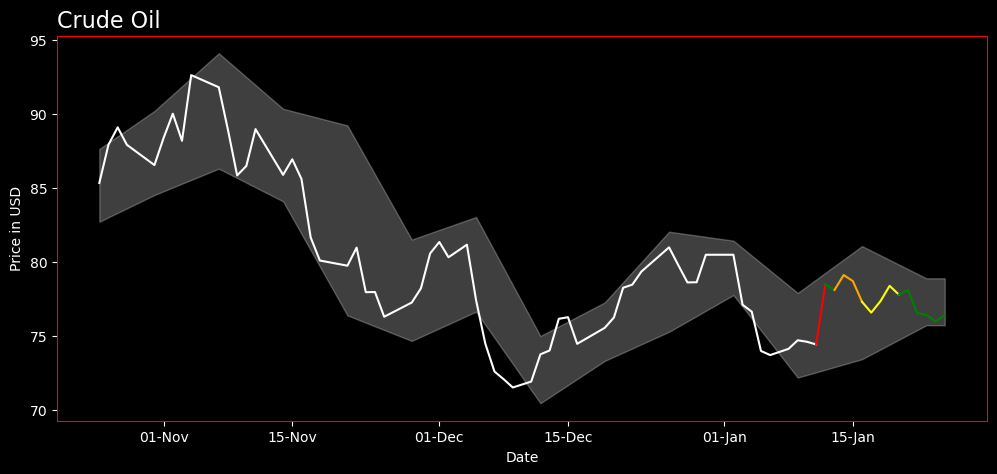

In [83]:
# green
fig, ax = plt.subplots()
plt.gcf().set_size_inches(12, 5, forward=True)
currentFig = plt.gcf()
# styling
plt.style.use('dark_background')

# Create the line chart
plt.plot(mynewdf[-74:-14].index, mynewdf['Price'][-74:-14], color="white")
plt.plot(mynewdf[-15:-13].index, mynewdf['Price'][-15:-13], color="red")
plt.plot(mynewdf[-14:-11].index, mynewdf['Price'][-14:-11], color="green")
plt.plot(mynewdf[-13:-9].index, mynewdf['Price'][-13:-9], color="orange")
plt.plot(mynewdf[-10:-5].index, mynewdf['Price'][-10:-5], color="yellow")
plt.plot(mynewdf[-6:].index, mynewdf['Price'][-6:], color="green")

# Add the 95% confidence interval to the chart
plt.fill_between(mynewdf[-74:].index, mynewdf['ConfidenceLow'][-74:], mynewdf['ConfidenceHigh'][-74:], alpha=0.25, color="white")


# styling
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price in USD', fontsize=10)
plt.title('Crude Oil', fontsize=16, loc='left')

# Show the chart
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))

for spine in ax.spines.values():
    spine.set_color('red')

# turn off the top frame
plt.frameon = False
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def get_crude_dataset():
    # load historical data
    try:
        hist_crude = pd.read_csv("../historical-dataset/Crude Oil Prices.csv")
    except FileNotFoundError:
        hist_crude = pd.DataFrame()
    hist_crude["Date"] = pd.to_datetime(hist_crude["Date"])

    url = "https://www.investing.com/commodities/crude-oil-historical-data"
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", {"class": "genTbl closedTbl historicalTbl"})
    dfs = pd.read_html(str(table))
    new_crude = pd.DataFrame(dfs[0])
    new_crude.columns = new_crude.columns.str.strip() # removing whitespaces
    new_crude.columns = new_crude.columns.str.lower() # lower casing columns
    new_crude.columns = new_crude.columns.str.replace(" ", "_") # replacing spaces with underscores
    
    # rename columns
    rename_col = {
        "date": "Date",
        "price": "Price",
        "open": "Open",
        "high": "High",
        "low": "Low",
        "vol.": "Volume"
    }
    new_crude.rename(columns=rename_col, inplace=True)
    # Checking for missing values
    for col in new_crude.columns:
        if new_crude[col].isna().sum() > 0:
            raise ValueError(f"{col} contains {new_crude[col].isna().sum()} missing values")

    new_crude["Date"] = pd.to_datetime(new_crude["Date"], format='%b %d, %Y')
    new_crude.sort_values(by="Date", inplace=True)
    new_crude = new_crude.reset_index(drop=True)
    # concatenating the two dataframes
    concat_df = pd.concat([hist_crude, new_crude])
    concat_df.drop_duplicates("Date", inplace=True)
    # Saving the concatenated dataframe
    now = pd.datetime.now()
    filename = f"../historical-dataset/Crude Oil Prices {now:%Y-%m-%d %H:%M}.csv"
    concat_df.to_csv(filename, index=False)